# **Lokalisasi Pupil Menggunakan CNN** <a class="anchor" id="7"></a>
================================================

Nama : Satria Baladewa Harahap


### 1. Mengunduh Data dan Unzip file dataset

In [1]:
%%capture
!wget https://www2.unavarra.es/gesadj/GI4E/gi4e_database.zip
!unzip gi4e_database.zip

### 2. Mengimport Module yang Dibutuhkan


In [2]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import glob
import numpy as np
import pandas as pd

### 3. Data Preprocessing

#### 3.1. Membaca Data dan Eksplorasi Data
- Mengubah gambar menjadi abu-abu dan simpan dalam list lalu  visualisasikan salah satu gambar



Number of images in dataset : 1236



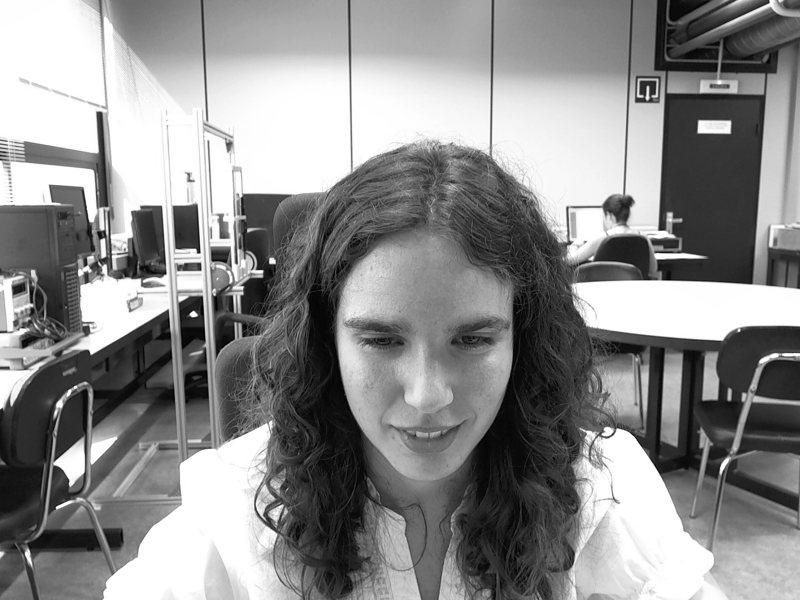

In [3]:
images = [cv2.imread(img,0) for img in sorted(glob.glob("/content/images/*.png"))]
print(f'Number of images in dataset : {len(images)}\n')
cv2_imshow(images[0])  

#### 3.2. Membaca label setiap gambar menggunakan pandas

In [4]:
data = pd.read_csv('/content/labels/image_labels.txt',sep = "\t",header=None)
data = data.loc[:, 1:12]
data

,1,2,3,4,5,6,7,8,9,10,11,12
0,490.63,338.28,471.22,338.41,452.86,341.93,401.95,342.45,383.33,339.84,362.63,338.41
1,493.49,332.94,479.30,333.33,455.86,340.23,404.69,340.11,391.02,334.50,364.58,335.81
2,495.05,333.86,477.47,332.94,458.07,339.32,407.29,339.71,389.45,333.33,368.88,334.89
3,493.62,334.25,472.66,332.42,456.38,338.80,405.08,340.11,385.03,334.11,367.84,336.46
4,495.83,333.33,470.57,331.64,457.68,338.02,406.77,339.45,382.81,333.33,369.92,334.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1231,503.25,152.61,491.80,151.69,477.21,153.00,427.47,157.29,414.19,158.20,401.56,161.85
1232,504.04,154.04,493.88,153.52,478.25,153.91,428.52,158.20,416.67,160.16,401.43,163.15
1233,504.82,154.56,493.62,153.00,478.64,154.17,428.52,158.59,416.67,160.68,402.34,163.54
1234,505.47,155.60,490.89,154.82,478.78,154.95,428.25,159.38,414.19,161.33,402.34,164.06


In [5]:
x1 = data[1].to_numpy().astype(int)
y1 = data[2].to_numpy().astype(int)
x2 = data[3].to_numpy().astype(int)
y2 = data[4].to_numpy().astype(int)
x3 = data[5].to_numpy().astype(int)
y3 = data[6].to_numpy().astype(int)
x4 = data[7].to_numpy().astype(int)
y4 = data[8].to_numpy().astype(int)
x5 = data[9].to_numpy().astype(int)
y5 = data[10].to_numpy().astype(int)
x6 = data[11].to_numpy().astype(int)
y6 = data[12].to_numpy().astype(int)

#### 3.3. Visualisasikan satu gambar dan membuat penanda untuk sudut mata dan pusat iris


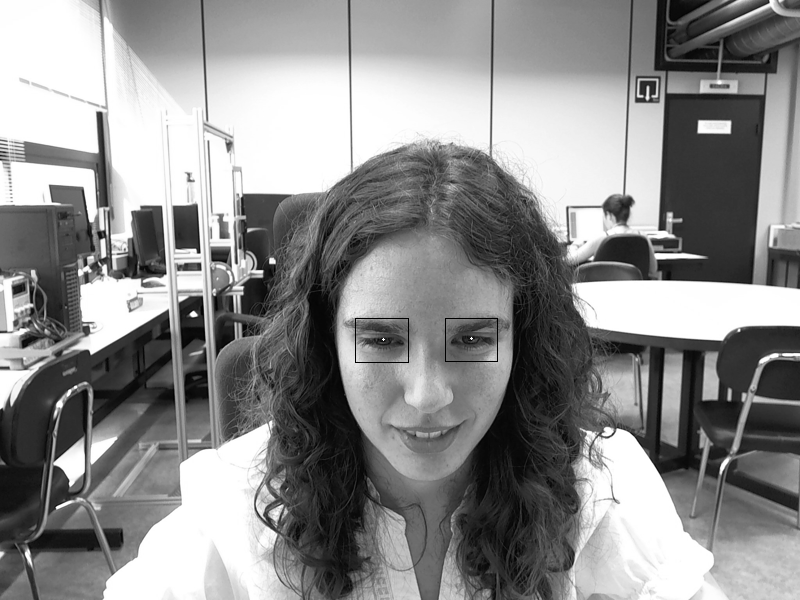

(600, 800)


In [6]:
Upper_Left = (x1[0]+7, y1[0]-20)
Bottom_Right = (x3[0]-7, y3[0]+20)
L_center_coordinates = (x2[0], y2[0]) 
Upper_Right = (x4[0]+7, y4[0]+20)
Bottom_Left = (x6[0]-7, y6[0]-20)
R_center_coordinates = (x5[0], y5[0]) 
new_image = images[0].copy()
new_image = cv2.rectangle(new_image, Upper_Left, Bottom_Right, color=(0,255,0), thickness=1) 
new_image = cv2.circle(new_image, L_center_coordinates, radius=0, color=(255,0,0), thickness=2) 
new_image = cv2.rectangle(new_image, Upper_Right, Bottom_Left, color=(0,255,0), thickness=1) 
new_image = cv2.circle(new_image, R_center_coordinates, radius=0, color=(255,0,0), thickness=2)
cv2_imshow(new_image)
print(new_image.shape)

#### 3.4. Pangkas (Crop) bagian mata pada gambar dan visualisasikan gambar yang dipotong



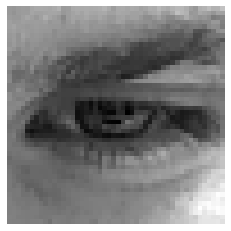

(48, 48)


In [7]:
crop_images = []
x_iris = np.zeros(x2.shape,dtype=int)
y_iris = np.zeros(y2.shape,dtype=int)
for j in range(len(images)):
  mx = int((x1[j] + x3[j])/2) 
  my = int((y3[j] + y1[j])/2)

  Xc = mx-24
  Yc = my-24

  x_iris[j] = x2[j]-Xc
  y_iris[j] = y2[j]-Yc

  crop_images.append(images[j][Yc:Yc+48 , Xc:Xc+48])

# cv2_imshow(crop_images[0])
plt.axis("off")
plt.imshow(crop_images[0], cmap='gray')
plt.show()
print(crop_images[0].shape)

#### 3.5. Normalisasikan gambar (bagi dengan angka 255)

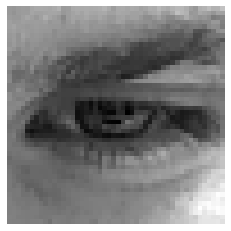

In [8]:
crop_images = np.array(crop_images)
N_images = crop_images/255.0

plt.axis("off")
plt.imshow(N_images[0], cmap='gray')
plt.show()

#### 3.6. Membuat dataset final X , Y

- Menerapkan pemfilteran Dilatasi dan Gaussian ke target untuk meningkatkan akurasi.


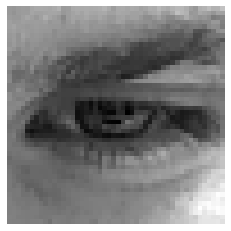

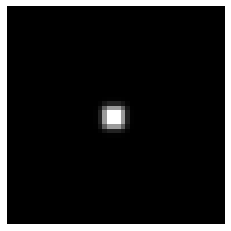

(48, 48)


In [9]:
from scipy.ndimage import gaussian_filter

X = N_images
Y = np.zeros(X.shape)

#Atur kernel untuk Dilatasi 
kernel = np.ones((3,3),np.uint8)

for k in range(len(X)):
  img = np.zeros((48,48))
  img[x_iris[k],y_iris[k]] = 1
  
  img = gaussian_filter(img, 1)
  img = cv2.dilate(img,kernel,iterations = 1)
  
  Y[k] = img
 
plt.axis("off")
plt.imshow(X[0], cmap='gray')
plt.show()

plt.axis("off")
plt.imshow(Y[0], cmap='gray')
plt.show()
print(Y[0].shape)

#### 3.7. Data dibagi menjadi data training dan data testing
- Data testing diatur sebesar 20%.
- X, Y diperluas 1 dimensi agar sesuai dengan dimensi model CNN.


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

X_train = np.expand_dims(X_train, 1)
Y_train = np.expand_dims(Y_train, 1)
X_test = np.expand_dims(X_test, 1)
Y_test = np.expand_dims(Y_test, 1)

print(f'X_test size {X_test.shape} , Y_test size {Y_test.shape}')

X_test size (248, 1, 48, 48) , Y_test size (248, 1, 48, 48)


### 4. Membangun model


#### 4.1. Import Module yang Dibutuhkan

In [11]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

#### 4.2. Autoencoder
Di bagian ini, Autoencoder yang digunakan adalah :

- Base network
- Auxiliary Network
- Skip Connection

In [12]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        #Encoder layers:
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)  
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1) 
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        
        #Base Network:
        self.conv1_T = nn.ConvTranspose2d(256, 64, 4, stride=4)
        self.conv4 = nn.Conv2d(128, 64, 3, padding=1)
        self.conv5 = nn.Conv2d(64, 1, 3, padding=1)

        #Auxiliary Network:
        self.conv2_T = nn.ConvTranspose2d(256, 128, 4, stride=2,padding=1)
        self.conv3_T = nn.ConvTranspose2d(128, 64, 4, stride=2,padding=1)


    def forward(self, x):
        #Encoder:
        x_skip = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x_skip))
        x = self.pool1(x) 
        x = F.relu(self.conv3(x))
        x = self.pool2(x) 
    
        #Base Network:
        y = F.relu(self.conv1_T(x))
        y = torch.cat((x_skip,y),1)
        y = F.relu(self.conv4(y))
        y = torch.tanh(self.conv5(y))

        #Auxiliary Network:
        ax = F.relu(self.conv2_T(x))
        ax = F.relu(self.conv3_T(ax))
        ax = torch.tanh(self.conv5(ax))
     
        return y,ax

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Autoencoder().to(device)

#### 4.3. Functions 

Pada bagian ini dibuat beberapa function, yaitu : 
- Train Function.
- Test Function.
- TensorToImage yang mengubah tensor menjadi gambar.


In [13]:
def train(model, device, train_loader, optimizer, epoch,loss_func):
    model.train()
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        y,ax = model(data)
        loss1 = loss_func(y, target)
        loss2 = loss_func(ax, data)
        total_loss = loss1+loss2
        total_loss.backward()
        optimizer.step()
        epoch_loss += total_loss.item()
        print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, epoch, total_loss.item()))
       

def test(model, device, test_loader,loss_func):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
         for batch_idx, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            view_data = data
            y,ax = model(data)
            test_loss += loss_func(y, target).item()   
           
         test_loss /= len(test_loader.dataset)
         print('\nTest set: Average loss: {:.4f}'.format(test_loss)) 

    return y,view_data

def TensorToImage(tensor):
    tensor_ = tensor.cpu().numpy()
    tensor_ = tensor_.reshape([48, 48])
    return tensor_

## 4.4. CNN Model
Dalam tahap ini, akan dilakukan : 
- X, Y diubah menjadi torch tensors.
- Dataloaders dibuat.
- Pemodelan training and testing dilakukan. 
- Memvisualisasikan beberapa gambar.

Informasi pemodelan :
- Optimizer : Adam
- Learning rate = 0.001
- Jumlah epochs = 100 , dapat ditambahkan untuk meningkatkan akurasi
- Loss function : MSE
- Activation function : Tanh




epoch [2/1], loss:0.1965
epoch [2/1], loss:0.1643
epoch [2/1], loss:0.1153
epoch [2/1], loss:0.0386
epoch [2/1], loss:0.0888
epoch [2/1], loss:0.0367
epoch [2/1], loss:0.0393
epoch [2/1], loss:0.0536
epoch [2/1], loss:0.0396
epoch [2/1], loss:0.0259
epoch [2/1], loss:0.0343
epoch [2/1], loss:0.0332
epoch [2/1], loss:0.0194
epoch [2/1], loss:0.0174
epoch [2/1], loss:0.0173
epoch [2/1], loss:0.0193

Test set: Average loss: 0.0000
1
epoch [3/2], loss:0.0126
epoch [3/2], loss:0.0103
epoch [3/2], loss:0.0132
epoch [3/2], loss:0.0125
epoch [3/2], loss:0.0075
epoch [3/2], loss:0.0074
epoch [3/2], loss:0.0092
epoch [3/2], loss:0.0087
epoch [3/2], loss:0.0071
epoch [3/2], loss:0.0072
epoch [3/2], loss:0.0079
epoch [3/2], loss:0.0059
epoch [3/2], loss:0.0061
epoch [3/2], loss:0.0061
epoch [3/2], loss:0.0058
epoch [3/2], loss:0.0063

Test set: Average loss: 0.0000
2
epoch [4/3], loss:0.0054
epoch [4/3], loss:0.0053
epoch [4/3], loss:0.0059
epoch [4/3], loss:0.0049
epoch [4/3], loss:0.0040
epoch [

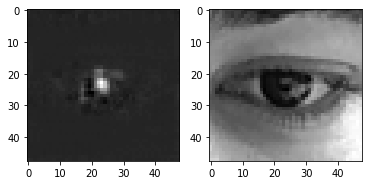

In [14]:
tensor_x_tr = torch.Tensor(X_train) 
tensor_y_tr = torch.Tensor(Y_train)
tensor_x_test = torch.Tensor(X_test) 
tensor_y_test = torch.Tensor(Y_test)

epochs = 100
learning_rate = 0.001
batchSize = 64
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

train_loader = DataLoader(TensorDataset(tensor_x_tr,tensor_y_tr),batch_size=batchSize,shuffle=True)
test_loader = DataLoader(TensorDataset(tensor_x_test,tensor_y_test),batch_size=batchSize, shuffle=False)

for epoch in range(1, epochs + 1):
  train(model, device, train_loader, optimizer, epoch, criterion)
  iris_pred , iris_img = test(model, device, test_loader, criterion)
  print(epoch)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(TensorToImage(iris_pred[0]),cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(TensorToImage(iris_img[0]),cmap='gray')
plt.show(block=True)

### 5. Prediksi
10 gambar testing dipilih untuk diprediksi dan memvisualisasikan titik tengah pupil yang diprediksi. 


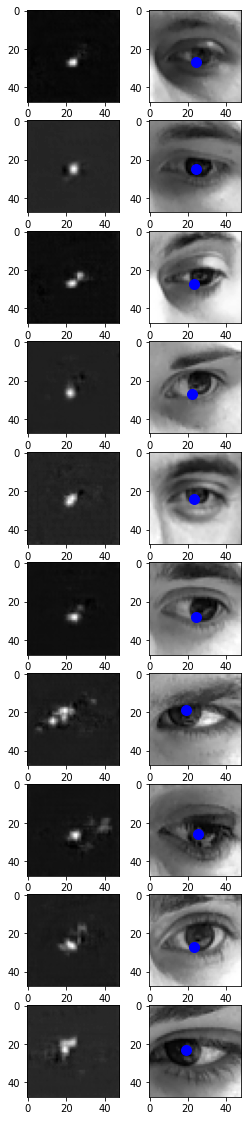

In [15]:
fig = plt.figure(figsize=[4,20])
for i in range(0,10):
  y_iris_pred = TensorToImage(iris_pred[i+3])
  view_img = TensorToImage(iris_img[i+3])

  (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(y_iris_pred)
  #print(maxLoc)

  fig.add_subplot(10,2,i*2+1)
  plt.imshow(y_iris_pred,cmap='gray')

  fig.add_subplot(10,2,i*2+2)
  plt.imshow(view_img,cmap='gray')
  plt.plot(maxLoc[0], maxLoc[1], 'b.', markersize=20)